# Depuración y selección de variables
<hr>

<code> **Proyecto de Datos II** </code>

In [1]:
import pandas as pd

In [3]:
df = pd.read_parquet("datos_final.parquet")
df_original = df.copy()

In [5]:
df

,takeoff_time,timestamp,icao,callsign,holding_point,runway,operator,turbulence_category,lat,lon,...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa)
0,303.0,2024-11-07 05:02:26.219,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
1,303.0,2024-11-07 05:02:26.721,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
2,295.0,2024-11-07 05:02:34.900,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
3,294.0,2024-11-07 05:02:35.399,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
4,294.0,2024-11-07 05:02:35.706,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152078,102.0,2025-01-31 21:21:47.641,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499481,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152079,97.0,2025-01-31 21:21:52.530,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499489,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152080,92.0,2025-01-31 21:21:57.322,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499500,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152081,108.0,2025-01-31 22:09:03.546,344455,IBS1679_,Z4,36L/18R,IBS,High vortex aircraft,40.492569,-3.57614,...,5.5,7.1,9.0,0.273,13.9,0.243,0.133,0.141,0.0,0.28


### Modificaciones estéticas

In [8]:
import re

# Limpiamos la columna 'turbulence_category' eliminando lo que esté entre paréntesis
df["turbulence_category"] = df["turbulence_category"].apply(lambda x: re.sub(r"\(.*\)", "", str(x)).strip())
df["last_event_turb_cat"] = df["last_event_turb_cat"].apply(lambda x: re.sub(r"\(.*\)", "", str(x)).strip())

### Outliers

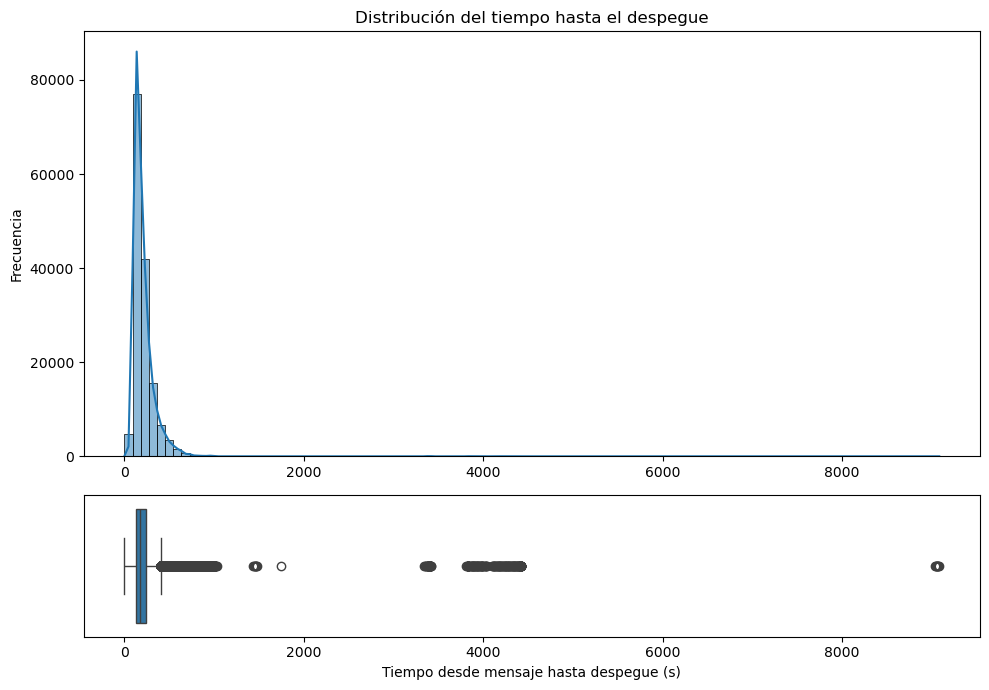

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Crear figura y rejilla
fig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Histograma con KDE en la parte superior
ax0 = plt.subplot(gs[0])
sns.histplot(df["takeoff_time"], bins=100, kde=True, ax=ax0)
ax0.set_title("Distribución del tiempo hasta el despegue")
ax0.set_xlabel("")  # Ocultar etiqueta para no repetir
ax0.set_ylabel("Frecuencia")

# Boxplot horizontal debajo
ax1 = plt.subplot(gs[1], sharex=ax0)
sns.boxplot(x=df["takeoff_time"], ax=ax1, orient='h')
ax1.set_xlabel("Tiempo desde mensaje hasta despegue (s)")
ax1.set_yticks([])  # Ocultar eje y porque no aporta aquí

plt.tight_layout()
plt.show()


In [12]:
df_original

,takeoff_time,timestamp,icao,callsign,holding_point,runway,operator,turbulence_category,lat,lon,...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa)
0,303.0,2024-11-07 05:02:26.219,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
1,303.0,2024-11-07 05:02:26.721,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
2,295.0,2024-11-07 05:02:34.900,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
3,294.0,2024-11-07 05:02:35.399,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492519,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
4,294.0,2024-11-07 05:02:35.706,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light (less than 7000 kg),40.492531,-3.57625,...,11.9,14.6,16.2,0.316,20.4,0.319,0.205,0.164,0.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152078,102.0,2025-01-31 21:21:47.641,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499481,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152079,97.0,2025-01-31 21:21:52.530,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499489,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152080,92.0,2025-01-31 21:21:57.322,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2 (between 34000 kg to 136000 kg),40.499500,-3.56052,...,6.5,7.2,9.0,0.274,13.9,0.243,0.133,0.141,0.0,0.35
152081,108.0,2025-01-31 22:09:03.546,344455,IBS1679_,Z4,36L/18R,IBS,High vortex aircraft,40.492569,-3.57614,...,5.5,7.1,9.0,0.273,13.9,0.243,0.133,0.141,0.0,0.28


In [13]:
import pandas as pd

def remove_bounds_callsigns(df, columna, limite_inferior, limite_superior):
    """
    Elimina todas las filas que no cumplen con la condición especificada en la columna
    (por debajo del límite inferior o por encima del límite superior),
    y luego elimina todas las filas con el mismo callsign que esas filas no válidas
    **solo del mismo día**.

    Parámetros:
        df (pd.DataFrame): DataFrame original.
        columna (str): Nombre de la columna en la cual aplicar la condición.
        limite_inferior (float): Valor mínimo para que la fila sea válida.
        limite_superior (float): Valor máximo para que la fila sea válida.

    Retorna:
        pd.DataFrame: DataFrame filtrado sin las filas no válidas y sin los callsign asociados.
        int: Número de filas eliminadas.
    """
    # Filtramos el DataFrame para obtener las filas válidas
    df_valido = df[(df[columna] > limite_inferior) & (df[columna] < limite_superior)]
    
    # Identificamos las filas no válidas
    filas_invalidas = df[(df[columna] <= limite_inferior) | (df[columna] >= limite_superior)]
    
    # Extraemos la fecha del timestamp (sin la parte de la hora)
    filas_invalidas['fecha'] = pd.to_datetime(filas_invalidas['timestamp']).dt.date
    
    # Identificamos los callsign de las filas no válidas y sus fechas correspondientes
    callsign_invalidos = filas_invalidas[['callsign', 'fecha']].drop_duplicates()
    
    # Para cada callsign, eliminamos las filas del mismo día que contienen ese callsign
    df_final = df.copy()
    for callsign, fecha in zip(callsign_invalidos['callsign'], callsign_invalidos['fecha']):
        df_final = df_final[~((df_final['callsign'] == callsign) & (pd.to_datetime(df_final['timestamp']).dt.date == fecha))]
    
    # Contamos el número de filas eliminadas
    filas_eliminadas = len(df) - len(df_final)
    
    return df_final, filas_eliminadas, callsign_invalidos

# Llamada de ejemplo
df, filas_eliminadas, callsign_invalidos = remove_bounds_callsigns(df, "takeoff_time", 20, 1250)

print(f"Se eliminaron {filas_eliminadas} filas. {len(callsign_invalidos)} vuelos distintos.")


/var/folders/dp/1z2xwn7516q1b4n5t3nlr0500000gn/T/ipykernel_10902/1223261481.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_invalidas['fecha'] = pd.to_datetime(filas_invalidas['timestamp']).dt.date


Se eliminaron 559 filas. 16 vuelos distintos.


In [16]:
filas_eliminadas / (filas_eliminadas + df.shape[0])

0.00367562449451944

/var/folders/dp/1z2xwn7516q1b4n5t3nlr0500000gn/T/ipykernel_10902/3575081728.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


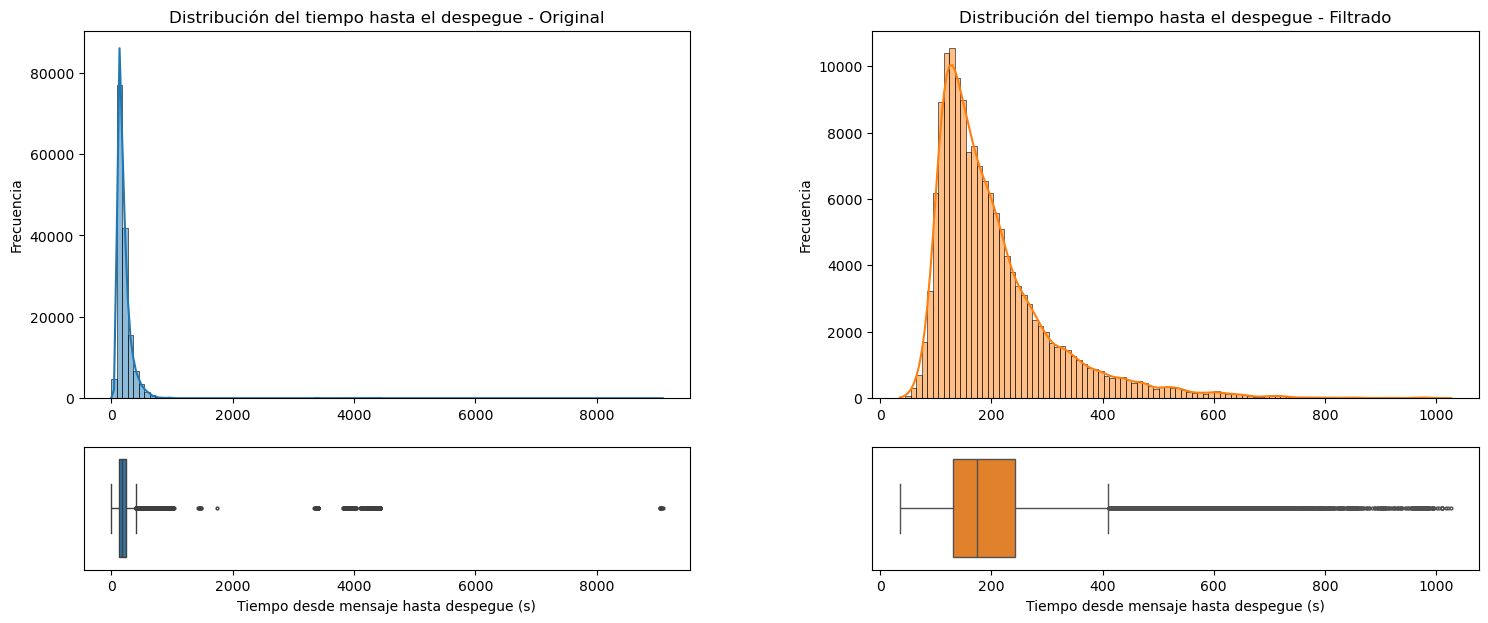

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Crear figura y rejilla general
fig = plt.figure(figsize=(18, 7))
outer_gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)

# ====== Izquierda: df_original ======
gs_left = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[0], height_ratios=[3, 1])

# Histograma con KDE
ax0_left = plt.Subplot(fig, gs_left[0])
sns.histplot(df_original["takeoff_time"], bins=100, kde=True, ax=ax0_left, color="#1f77b4")
ax0_left.set_title("Distribución del tiempo hasta el despegue - Original")
ax0_left.set_xlabel("")
ax0_left.set_ylabel("Frecuencia")
fig.add_subplot(ax0_left)

# Boxplot
ax1_left = plt.Subplot(fig, gs_left[1], sharex=ax0_left)
sns.boxplot(x=df_original["takeoff_time"], ax=ax1_left, orient='h', color="#1f77b4", fliersize=2)
ax1_left.set_xlabel("Tiempo desde mensaje hasta despegue (s)")
ax1_left.set_yticks([])
fig.add_subplot(ax1_left)

# ====== Derecha: df ======
gs_right = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer_gs[1], height_ratios=[3, 1])

# Histograma con KDE
ax0_right = plt.Subplot(fig, gs_right[0])
sns.histplot(df["takeoff_time"], bins=100, kde=True, ax=ax0_right, color="#ff7f0e")
ax0_right.set_title("Distribución del tiempo hasta el despegue - Filtrado")
ax0_right.set_xlabel("")
ax0_right.set_ylabel("Frecuencia")
fig.add_subplot(ax0_right)

# Boxplot
ax1_right = plt.Subplot(fig, gs_right[1], sharex=ax0_right)
sns.boxplot(x=df["takeoff_time"], ax=ax1_right, orient='h', color="#ff7f0e", fliersize=2)
ax1_right.set_xlabel("Tiempo desde mensaje hasta despegue (s)")
ax1_right.set_yticks([])
fig.add_subplot(ax1_right)

# Ajustes finales
plt.tight_layout()
plt.show()

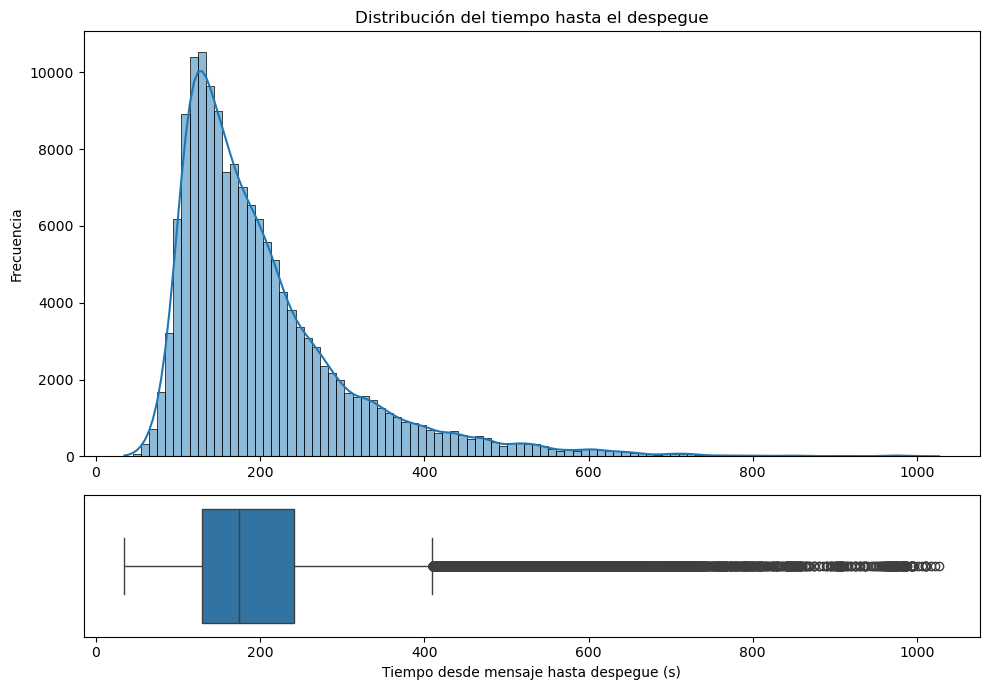

In [21]:
# Crear figura y rejilla
fig = plt.figure(figsize=(10, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Histograma con KDE en la parte superior
ax0 = plt.subplot(gs[0])
sns.histplot(df["takeoff_time"], bins=100, kde=True, ax=ax0)
ax0.set_title("Distribución del tiempo hasta el despegue")
ax0.set_xlabel("")  # Ocultar etiqueta para no repetir
ax0.set_ylabel("Frecuencia")

# Boxplot horizontal debajo
ax1 = plt.subplot(gs[1], sharex=ax0)
sns.boxplot(x=df["takeoff_time"], ax=ax1, orient='h')
ax1.set_xlabel("Tiempo desde mensaje hasta despegue (s)")
ax1.set_yticks([])  # Ocultar eje y porque no aporta aquí

plt.tight_layout()
plt.show()

In [22]:
df.to_parquet("datos.parquet")

In [24]:
df.describe()

,takeoff_time,timestamp,lat,lon,last_min_takeoffs,last_min_landings,time_since_last_event_seconds,time_before_holding_point,time_at_holding_point,hour,...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa)
count,151524.000000,151524,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,...,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000,151524.000000
mean,204.767958,2024-12-19 11:05:33.242859520,40.494583,-3.568997,1.015674,0.637371,114.967847,1204.740998,40.378554,12.937911,...,7.053899,7.680494,10.989197,0.193474,17.704942,0.189467,0.138379,0.142937,0.077684,0.297274
min,35.000000,2024-11-07 05:02:26.219000,40.484131,-3.577780,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,-2.600000,1.800000,7.300000,0.104000,13.900000,0.131000,0.131000,0.141000,0.000000,0.000000
25%,130.000000,2024-11-28 05:15:28.277000192,40.491920,-3.575870,1.000000,0.000000,43.000000,668.000000,6.000000,10.000000,...,2.800000,4.500000,8.600000,0.137000,15.800000,0.163000,0.132000,0.141000,0.000000,0.070000
50%,174.000000,2024-12-19 15:52:47.739000064,40.492619,-3.574790,1.000000,1.000000,65.000000,886.000000,14.000000,13.000000,...,7.400000,7.400000,9.500000,0.172000,17.900000,0.174000,0.132000,0.141000,0.040000,0.210000
75%,242.000000,2025-01-09 06:49:06.084750080,40.499470,-3.560520,1.000000,1.000000,107.000000,1178.000000,33.000000,15.000000,...,10.700000,10.400000,14.000000,0.240000,19.800000,0.203000,0.132000,0.141000,0.150000,0.490000
max,1027.000000,2025-01-31 22:09:08.321000,40.501308,-3.558730,7.000000,7.000000,15478.000000,62543.000000,906.000000,23.000000,...,17.900000,15.100000,16.200000,0.423000,20.900000,0.319000,0.209000,0.164000,0.290000,1.140000
std,109.727198,NaN,0.006819,0.008199,0.735499,0.683144,286.148722,1742.276088,75.257541,4.357979,...,4.627012,3.458887,2.874198,0.068818,2.116973,0.042025,0.020908,0.006388,0.084880,0.268558


### Nulos

In [28]:
df.isna().sum().sum()

1649

In [30]:
for c, x in zip(df.columns, df.isna().sum()):
    print(c, x)

takeoff_time 0
timestamp 0
icao 0
callsign 0
holding_point 0
runway 0
operator 0
turbulence_category 0
lat 0
lon 0
last_min_takeoffs 0
last_event 0
last_min_landings 0
last_event_turb_cat 0
time_since_last_event_seconds 0
time_before_holding_point 0
time_at_holding_point 0
hour 0
weekday 0
is_holiday 0
event_timestamp 0
first_holding_time 0
first_airborne_time 0
first_on_ground_time 0
Z1 0
KA6 0
KA8 0
K3 0
K2 0
K1 0
Y1 0
Y2 0
Y3 0
Y7 0
Z6 0
Z4 0
Z2 0
Z3 0
LF 0
L1 0
LA 0
LB 0
LC 0
LD 0
LE 0
36R_18L 0
32R_14L 0
36L_18R 0
32L_14R 0
time 0
temperature_2m (°C) 0
relative_humidity_2m (%) 0
dew_point_2m (°C) 0
apparent_temperature (°C) 0
precipitation (mm) 0
rain (mm) 0
snowfall (cm) 0
snow_depth (m) 1649
weather_code (wmo code) 0
pressure_msl (hPa) 0
surface_pressure (hPa) 0
cloud_cover (%) 0
cloud_cover_low (%) 0
cloud_cover_mid (%) 0
cloud_cover_high (%) 0
is_day () 0
wind_speed_10m (km/h) 0
wind_speed_100m (km/h) 0
wind_direction_10m (°) 0
wind_direction_100m (°) 0
wind_gusts_10m (km/h) 0

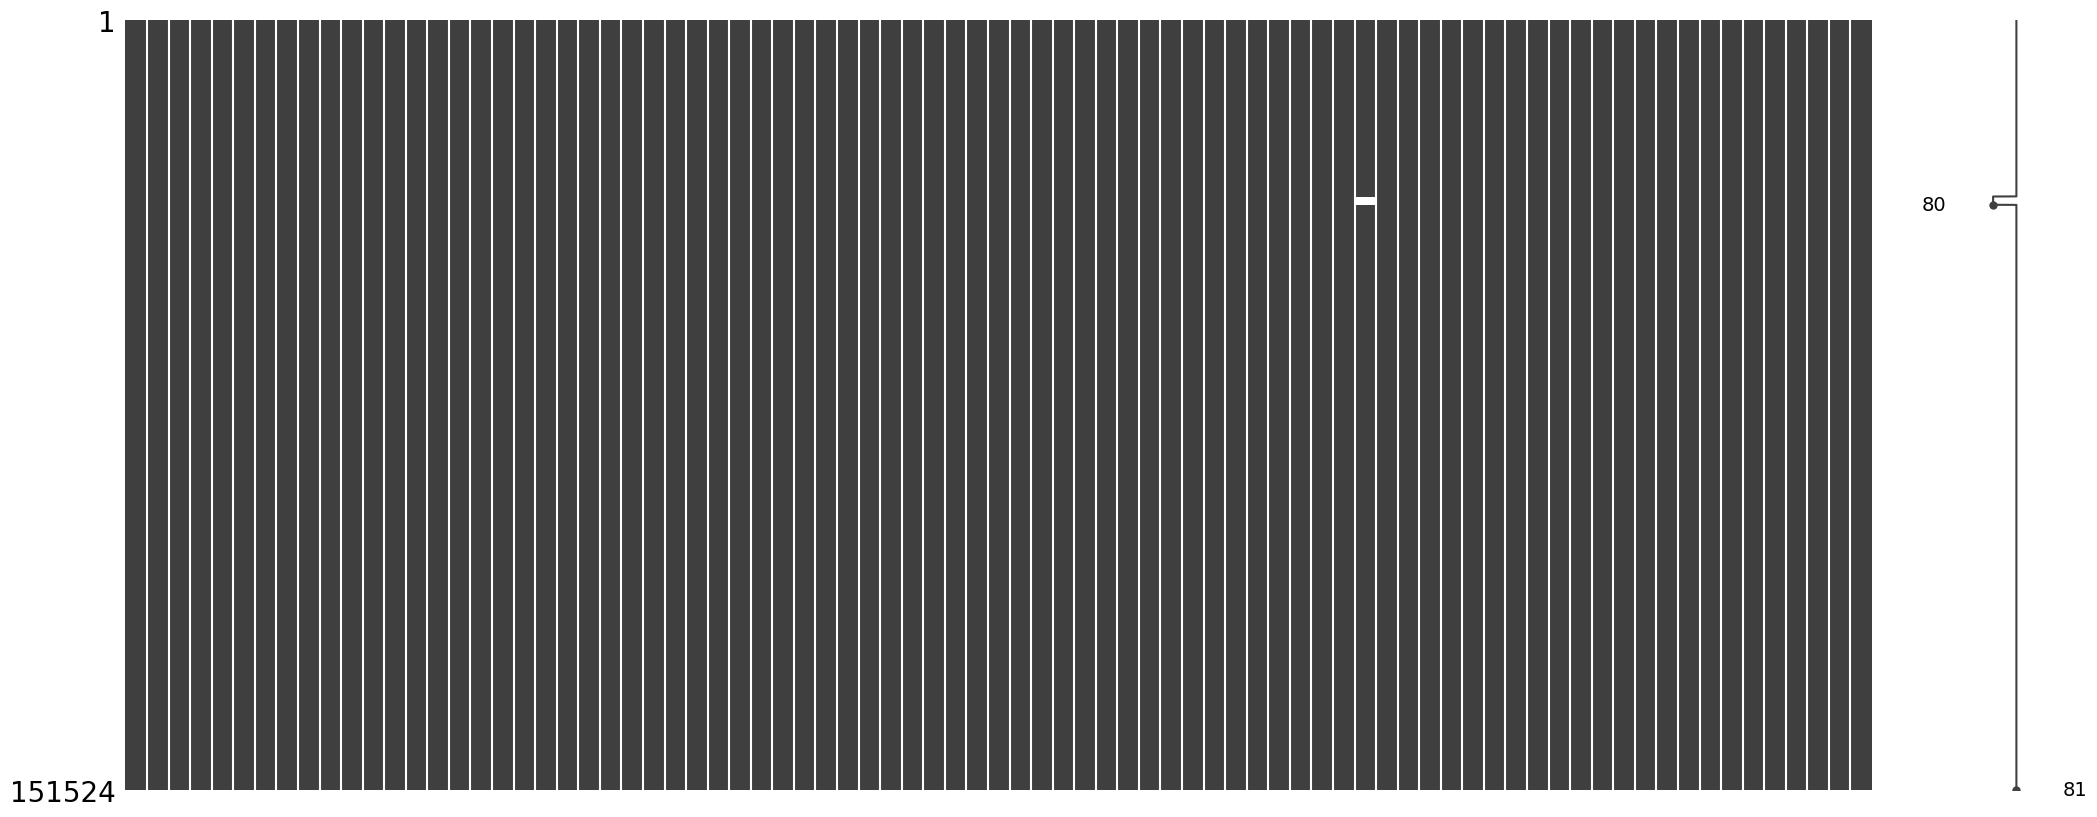

In [32]:
import missingno as msno
msno.matrix(df)
plt.show()

Contiene 1649 nulos.

In [34]:
df = df.drop(columns=["snow_depth (m)"], axis=1)

### Selección de variables

In [38]:
df.columns

Index(['takeoff_time', 'timestamp', 'icao', 'callsign', 'holding_point',
       'runway', 'operator', 'turbulence_category', 'lat', 'lon',
       'last_min_takeoffs', 'last_event', 'last_min_landings',
       'last_event_turb_cat', 'time_since_last_event_seconds',
       'time_before_holding_point', 'time_at_holding_point', 'hour', 'weekday',
       'is_holiday', 'event_timestamp', 'first_holding_time',
       'first_airborne_time', 'first_on_ground_time', 'Z1', 'KA6', 'KA8', 'K3',
       'K2', 'K1', 'Y1', 'Y2', 'Y3', 'Y7', 'Z6', 'Z4', 'Z2', 'Z3', 'LF', 'L1',
       'LA', 'LB', 'LC', 'LD', 'LE', '36R_18L', '32R_14L', '36L_18R',
       '32L_14R', 'time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'weather_code (wmo code)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high

In [40]:
eliminar_no_varianza = [
    "last_event", 
]

eliminar_correlacion = [
    'apparent_temperature (°C)', 'rain (mm)', 'pressure_msl (hPa)', 'wind_speed_100m (km/h)', 'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'vapour_pressure_deficit (kPa)' 
]

eliminar_otras = [
    'lat', 'lon', 'event_timestamp', 'first_holding_time', 'first_airborne_time', 'first_on_ground_time', 'time'
]

variables_eliminar = eliminar_no_varianza + eliminar_correlacion + eliminar_otras

df = df.drop(columns = variables_eliminar, axis=1)

In [42]:
df

,takeoff_time,timestamp,icao,callsign,holding_point,runway,operator,turbulence_category,last_min_takeoffs,last_min_landings,...,cloud_cover_mid (%),cloud_cover_high (%),is_day (),wind_speed_10m (km/h),wind_direction_10m (°),wind_direction_100m (°),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm)
0,303.0,2024-11-07 05:02:26.219,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
1,303.0,2024-11-07 05:02:26.721,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
2,295.0,2024-11-07 05:02:34.900,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
3,294.0,2024-11-07 05:02:35.399,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
4,294.0,2024-11-07 05:02:35.706,4CAC23,RYR99AM_,Z4,36L/18R,RYR,Light,0,1,...,0,0,0,6.0,3,41,0.316,20.4,0.164,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152078,102.0,2025-01-31 21:21:47.641,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2,0,1,...,0,12,0,0.4,360,243,0.274,13.9,0.141,0.0
152079,97.0,2025-01-31 21:21:52.530,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2,0,1,...,0,12,0,0.4,360,243,0.274,13.9,0.141,0.0
152080,92.0,2025-01-31 21:21:57.322,06A2E9,QTR23P__,Y1,36R/18L,QTR,Medium 2,0,1,...,0,12,0,0.4,360,243,0.274,13.9,0.141,0.0
152081,108.0,2025-01-31 22:09:03.546,344455,IBS1679_,Z4,36L/18R,IBS,High vortex aircraft,0,1,...,0,4,0,1.5,14,333,0.273,13.9,0.141,0.0


In [44]:
import pandas as pd

# Convertimos la columna 'timestamp' a tipo datetime (si aún no lo está)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Definimos la fecha límite
fecha_limite = pd.to_datetime('2025-01-15')

# Separamos los datos
df_train = df[df['timestamp'] < fecha_limite]
df_test = df[df['timestamp'] >= fecha_limite]

In [50]:
df.shape

(151524, 61)

In [52]:
df.to_parquet("datos.parquet")

In [46]:
len(df_test["callsign"].unique())

555

In [48]:
df_test.shape[0] / df.shape[0]

0.18340988886249043

In [23]:
df_train = df_train.sort_values(by='timestamp')
df_test = df_test.sort_values(by='timestamp')

In [24]:
df_train.to_parquet("train.parquet")
df_test.to_parquet("test.parquet")